In [1]:
import sys
sys.path.append('vysxd')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from FPC_define import *

In [2]:
A, B = FPC('EPW-alves')

We are interested to see the energy transfer in velocity space, so we need to integrate over x

Alternatively, just pick an x position that you want to look at.

In [19]:
A_int_wrt_x = np.trapz(A, axis = 1)
B_int_wrt_x = np.trapz(B, axis = 1)

# x_pos = 50
# A_int_wrt_x = A[x_pos,:,:]
# B_int_wrt_x = B[x_pos,:,:]


np.shape(A_int_wrt_x)

(128, 781)

Now, integrate over a couple timesteps such that the dissipative energy transfer overpowers the oscillatory

In [57]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='phase-space-animation', artist='Matplotlib',
                comment='visualizing the phase space evolution of the distribution function') # Describe what the animation is
writer = FFMpegWriter(fps=20, metadata=metadata) # you can adjust the fps here.

# Initialize the movie
fig = plt.figure()
window = 400
with writer.saving(fig, f"FPC_movie_kld-0.3_{500}.mp4", dpi=400):

# By my calculation, t = 6 starts at approximately i =9 4
    for i in range (101,500):

        A_full_int = 1/(i-100)*np.trapz(A_int_wrt_x[:,100:i], axis = 1)
        B_full_int = 1/(i-100)*np.trapz(B_int_wrt_x[:,100:i], axis = 1)
        plt.scatter(np.linspace(-0.3,0.3, len(B_full_int)),B_full_int,label = r'$\frac{dW}{dt}(v)$')  
        # plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int+B_full_int, label = r'$\frac{dW}{dt}(v)$ with v $\cdot \nabla$ term')
        vphase = 0.199
        plt.vlines([vphase],ymin=-9e-6,ymax=9e-6, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black')
        vphase_vtherm = 0.199*0.055
        plt.vlines([vphase_vtherm],ymin=-9e-6,ymax=9e-6, label = r'$v_{\phi} =$'+ str(vphase_vtherm), colors = 'black')
        # plt.xlim(0,0.2)
        # plt.ylim(-0.0004,0.0004)
        plt.ylabel('integrated change in energy density')
        plt.xlabel('v/c')
        plt.title(f'Integrating from t = {round(100*2*0.032,0)} to {round(i*2*0.032,0)}')
        plt.legend()
        writer.grab_frame()
        plt.cla()
        plt.clf()


<Figure size 640x480 with 0 Axes>

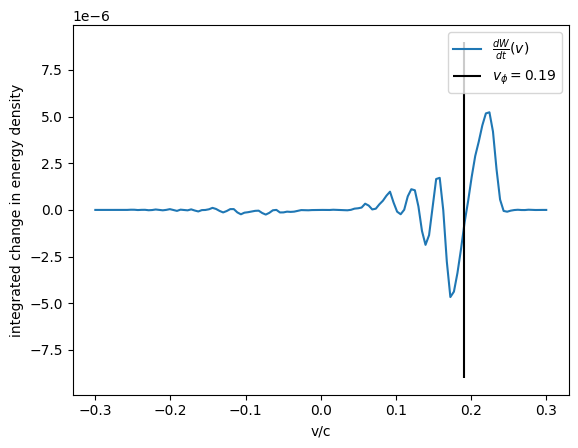

In [51]:
time_interval = [100,500]
A_full_int = 1/400 * np.trapz(A_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
B_full_int = 1/400 * np.trapz(B_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
plt.plot(np.linspace(-0.3,0.3, len(B_full_int)),B_full_int,label = r'$\frac{dW}{dt}(v)$')  
# plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int+B_full_int, label = r'$\frac{dW}{dt}(v)$ with v $\cdot \nabla$ term')
vphase = 0.19
plt.vlines([vphase],ymin=-9e-6,ymax=9e-6, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black')
# plt.xlim(0,0.2)
# plt.ylim(-0.0004,0.0004)
plt.ylabel('integrated change in energy density')
plt.xlabel('v/c')
# plt.title(f'Time: {i*2*400*0.032}')
plt.legend()